# Constructing decision tree depending on the generated labels

In [1]:
import pandas

df = pandas.read_csv('decision-tree.csv')

In [2]:
df.head(10)

,Frameworks,wandb,guild.ai,mlflow
0,Runtime,1.0,2.5,0.5
1,Parameters,3.0,2.5,4.0
2,No. of Lines,1.0,2.0,3.0
3,Pros & Cons,6.5,5.5,6.5
4,Collaboration,4.5,2.0,5.0
5,Memory,1.0,1.5,0.5


In [3]:
for row in df.T:
    print(row)

0
1
2
3
4
5


In [4]:
possibilities = {}
import numpy as np

for integer in range(64):
    #print(int(f'{integer:06b}'))
    possibilities[integer] = list(f'{integer:06b}')

In [5]:
bits = pandas.DataFrame.from_dict(possibilities).T

In [6]:
bits

,0,1,2,3,4,5
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
59,1,1,1,0,1,1
60,1,1,1,1,0,0
61,1,1,1,1,0,1
62,1,1,1,1,1,0


In [7]:
bits.columns
bits = bits.rename({0:'Runtime',1:'Parameters', 2:'No. of Lines',3:'Pros & Cons', 4:'Collaboration',5:'Memory'}, axis='columns')

In [8]:
bits

,Runtime,Parameters,No. of Lines,Pros & Cons,Collaboration,Memory
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
59,1,1,1,0,1,1
60,1,1,1,1,0,0
61,1,1,1,1,0,1
62,1,1,1,1,1,0


In [9]:
import operator

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['wandb', 'guild.ai', 'mlflow'])


labels =[]

for row in bits.T:
    #print(row)
    scores={'wandb':0, 'guild.ai':0, 'mlflow':0}
    order=0
    for criteria in bits.T[row]:
        #print(order, criteria)
        for framework in scores.keys():
            #print(framework)
            scores[framework]+= float(criteria) * df.T[order][framework]
        order+=1
    print(scores)
    label = max(scores.items(), key=operator.itemgetter(1))[0]
    
    # Find item with Max Value in Dictionary
    itemMaxValue = max(scores.items(), key=lambda x: x[1])
    print('maximum value in dictionary : ', itemMaxValue[1])
    listOfKeys = list()
    # Iterate over all the items in dictionary to find keys with max value
    for key, value in scores.items():
        if value == itemMaxValue[1]:
            listOfKeys.append(key)
    print('keys with maximum value in dictionary : ', listOfKeys)
    label = le.transform(listOfKeys)
    #print(row)
    labels.append(label)

{'wandb': 0.0, 'guild.ai': 0.0, 'mlflow': 0.0}
maximum value in dictionary :  0.0
keys with maximum value in dictionary :  ['wandb', 'guild.ai', 'mlflow']
{'wandb': 1.0, 'guild.ai': 1.5, 'mlflow': 0.5}
maximum value in dictionary :  1.5
keys with maximum value in dictionary :  ['guild.ai']
{'wandb': 4.5, 'guild.ai': 2.0, 'mlflow': 5.0}
maximum value in dictionary :  5.0
keys with maximum value in dictionary :  ['mlflow']
{'wandb': 5.5, 'guild.ai': 3.5, 'mlflow': 5.5}
maximum value in dictionary :  5.5
keys with maximum value in dictionary :  ['wandb', 'mlflow']
{'wandb': 6.5, 'guild.ai': 5.5, 'mlflow': 6.5}
maximum value in dictionary :  6.5
keys with maximum value in dictionary :  ['wandb', 'mlflow']
{'wandb': 7.5, 'guild.ai': 7.0, 'mlflow': 7.0}
maximum value in dictionary :  7.5
keys with maximum value in dictionary :  ['wandb']
{'wandb': 11.0, 'guild.ai': 7.5, 'mlflow': 11.5}
maximum value in dictionary :  11.5
keys with maximum value in dictionary :  ['mlflow']
{'wandb': 12.0, 'gu

In [10]:
list(le.classes_)

['guild.ai', 'mlflow', 'wandb']

In [11]:
len(labels)

64

In [12]:
bits['Label']=labels

In [13]:
bits

,Runtime,Parameters,No. of Lines,Pros & Cons,Collaboration,Memory,Label
0,0,0,0,0,0,0,"[2, 0, 1]"
1,0,0,0,0,0,1,[0]
2,0,0,0,0,1,0,[1]
3,0,0,0,0,1,1,"[2, 1]"
4,0,0,0,1,0,0,"[2, 1]"
...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,[1]
60,1,1,1,1,0,0,[1]
61,1,1,1,1,0,1,[1]
62,1,1,1,1,1,0,[1]


In [14]:
labels = [int(x) if len(x)==1 else x for x in labels]   
labels = [3 if np.array_equal(x, np.asarray([2, 0, 1])) else x for x in labels]
labels = [4 if np.array_equal(x, np.asarray([2, 1])) else x for x in labels]
labels = [5 if np.array_equal(x, np.asarray([0, 1])) else x for x in labels]
labels
# 0 = guild ai, 1 = mlflow, 2 = wandb, 3 = all labels, 4 = wandb & mlflow , 5 = guild ai & mlflow 

[3,
 0,
 1,
 4,
 4,
 2,
 1,
 4,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 4,
 2,
 0,
 0,
 4,
 2,
 0,
 0,
 1,
 1,
 5,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [15]:
bits['Label']=labels
bits

,Runtime,Parameters,No. of Lines,Pros & Cons,Collaboration,Memory,Label
0,0,0,0,0,0,0,3
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1
3,0,0,0,0,1,1,4
4,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...
59,1,1,1,0,1,1,1
60,1,1,1,1,0,0,1
61,1,1,1,1,0,1,1
62,1,1,1,1,1,0,1


In [16]:
data = bits.loc[:,'Runtime':'Memory']
data

,Runtime,Parameters,No. of Lines,Pros & Cons,Collaboration,Memory
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
59,1,1,1,0,1,1
60,1,1,1,1,0,0
61,1,1,1,1,0,1
62,1,1,1,1,1,0


In [17]:
labels = bits['Label']
labels

0     3
1     0
2     1
3     4
4     4
     ..
59    1
60    1
61    1
62    1
63    1
Name: Label, Length: 64, dtype: int64

decision tree


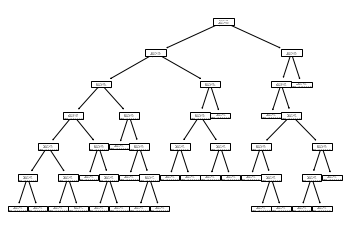

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0) #max_leaf_nodes=10
clf.fit(data, labels)
tree.plot_tree(clf) 
print('decision tree')

In [19]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names = ['Runtime', 'Parameters', 'No. of Lines', 'Pros & Cons','Collaboration', 'Memory'],
class_names=['guild.ai', 'mlflow', 'wandb', 'all', 'mlflow & wandb', 'guild.ai & mlflow']) 
graph = graphviz.Source(dot_data) 
graph.render("frameworks-8leaves") 

'frameworks-8leaves.pdf'

In [20]:
data = data.astype('int32')

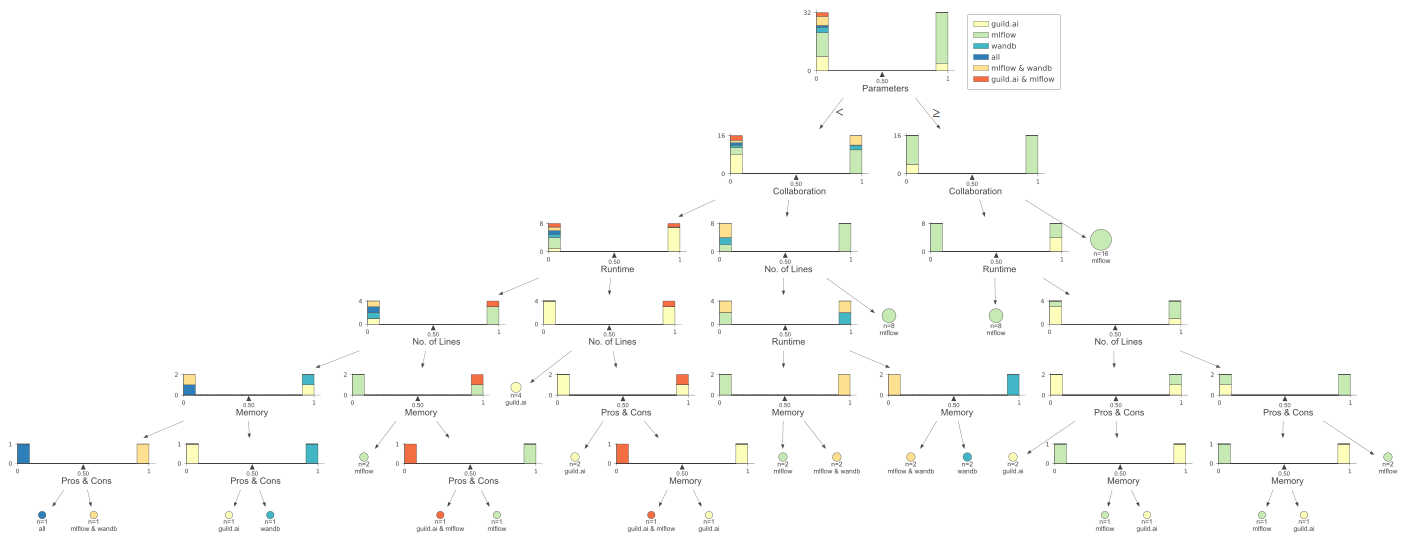

In [21]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, data, labels, 
               feature_names = ['Runtime', 'Parameters', 'No. of Lines', 'Pros & Cons','Collaboration', 'Memory'],

               class_names=['guild.ai', 'mlflow', 'wandb', 'all', 'mlflow & wandb', 'guild.ai & mlflow'])

viz

In [22]:
viz.save("frameworks-allleaves-tree.svg")

In [26]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
model = regr.fit(data, labels)

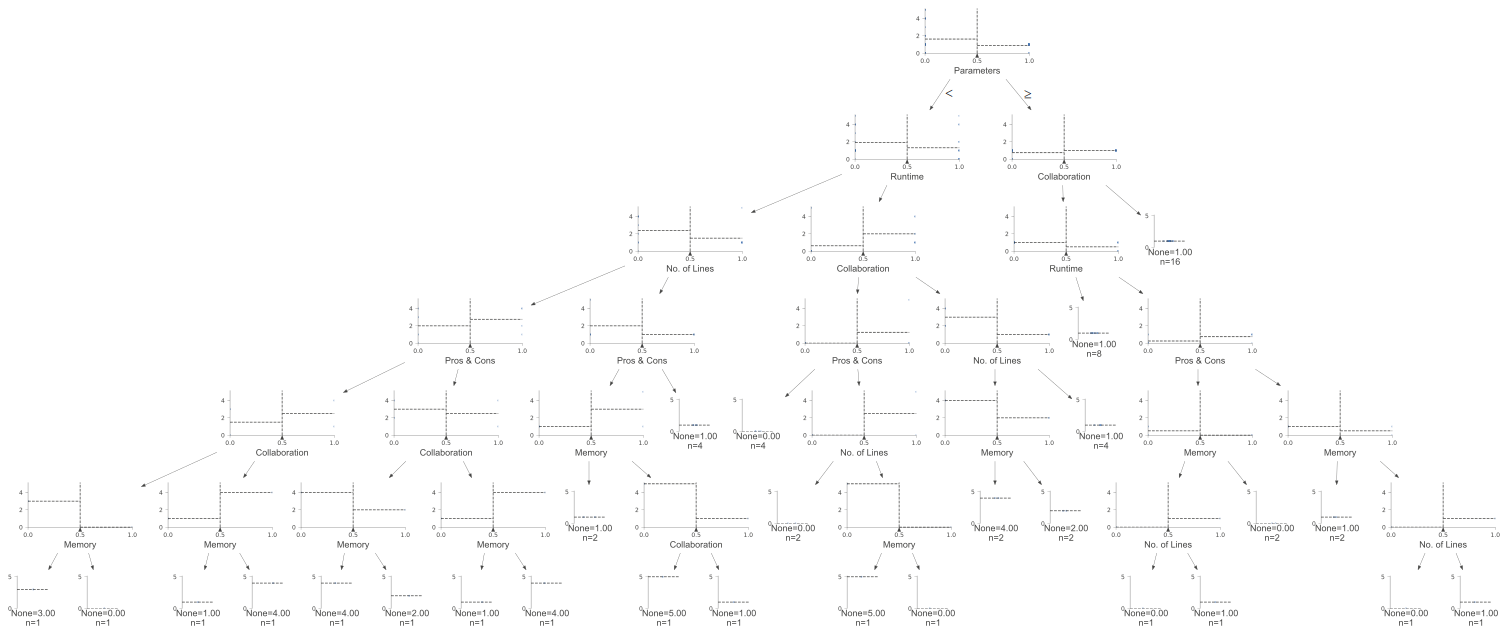

In [30]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(regr,data, labels,
               feature_names = ['Runtime', 'Parameters', 'No. of Lines', 'Pros & Cons','Collaboration', 'Memory'],
class_names=['guild.ai', 'mlflow', 'wandb', 'all', 'mlflow & wandb', 'guild.ai & mlflow'])
viz